In [1]:
import ipywidgets as widgets

import results
from results import dd_dataset, dd_object, dd_metric, slide_adds_th, slide_adds_auc_th

## Threshold ADD-S and ADD-S AUC

In [2]:
out = widgets.interactive(results.table, 
                          my_dataset=dd_dataset, 
                          my_object=dd_object,
                          my_adds_th=slide_adds_th,
                          my_adds_auc_th=slide_adds_auc_th)
display(out)

interactive(children=(Dropdown(description='Dataset', options=('shapenet.sim.easy', 'shapenet.sim.hard', 'shap…

## Percent Certifiable

In [3]:
out = widgets.interactive(results.table_certifiable, my_dataset=dd_dataset, my_object=dd_object)
display(out)

interactive(children=(Dropdown(description='Dataset', options=('shapenet.sim.easy', 'shapenet.sim.hard', 'shap…

## Evaluation Metric Distribution

In [4]:
out = widgets.interactive(results.plot, my_dataset=dd_dataset, my_object=dd_object, my_metric=dd_metric)
display(out)

interactive(children=(Dropdown(description='Dataset', options=('shapenet.sim.easy', 'shapenet.sim.hard', 'shap…

## Saving Figure

In [5]:
import matplotlib.pyplot as plt

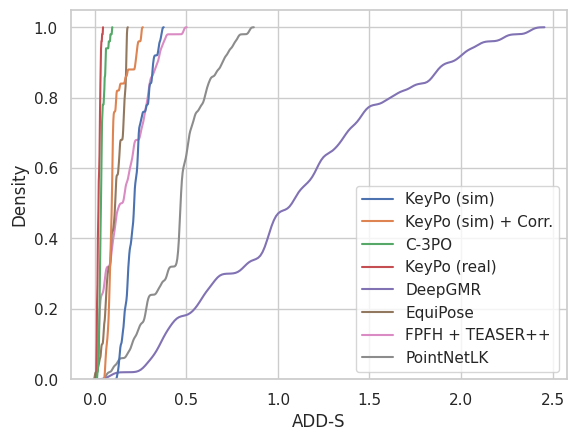

In [6]:
sns_plot = results.plot("shapenet.real.hard", "car", "adds", short=True)
fig = sns_plot.get_figure()
fig.savefig("runs/shapenet.real.hard.png")